In [15]:
import pandas as pd
import pickle
from ipywidgets import widgets
import matplotlib.pyplot as plt


def data_plot(X, y):
    def plotter(column):
        valid_rows = X[column].notna()
        plt.plot(X.loc[valid_rows, column], y[valid_rows], '.', color='k')
        plt.xlabel(column)
        plt.ylabel('Time')
    
    return plotter


# Intensity Data Visualization

In [16]:

df_pear = pd.read_csv('pear/pear_original.csv')

X = df_pear.drop('Time (ms)', axis=1)
y = df_pear['Time (ms)']


#dropdown_values = {"{0}: {1}".format(k, features_dict[k]):k for k in X.columns}
widgets.interact(data_plot(X, y), column=X.columns);

interactive(children=(Dropdown(description='column', options=('Intensity',), value='Intensity'), Output()), _d…

In [ ]:

df_pear = pd.read_csv('pear/pear_original.csv')
df_pear = df_pear.transpose()

X = df_pear.drop('Time (ms)', axis=1)
y = df_pear['Time (ms)']


#dropdown_values = {"{0}: {1}".format(k, features_dict[k]):k for k in X.columns}
widgets.interact(data_plot(X, y), column=X.columns);

# Scale Data Visualization

In [17]:

df_scale = pd.read_csv('scale/scale_original.csv')

X = df_scale.drop('Time (min)', axis=1)
y = df_scale['Time (min)']


#dropdown_values = {"{0}: {1}".format(k, features_dict[k]):k for k in X.columns}
widgets.interact(data_plot(X, y), column=X.columns);

interactive(children=(Dropdown(description='column', options=('190', '200', '210', '220', '230', '240', '250',…

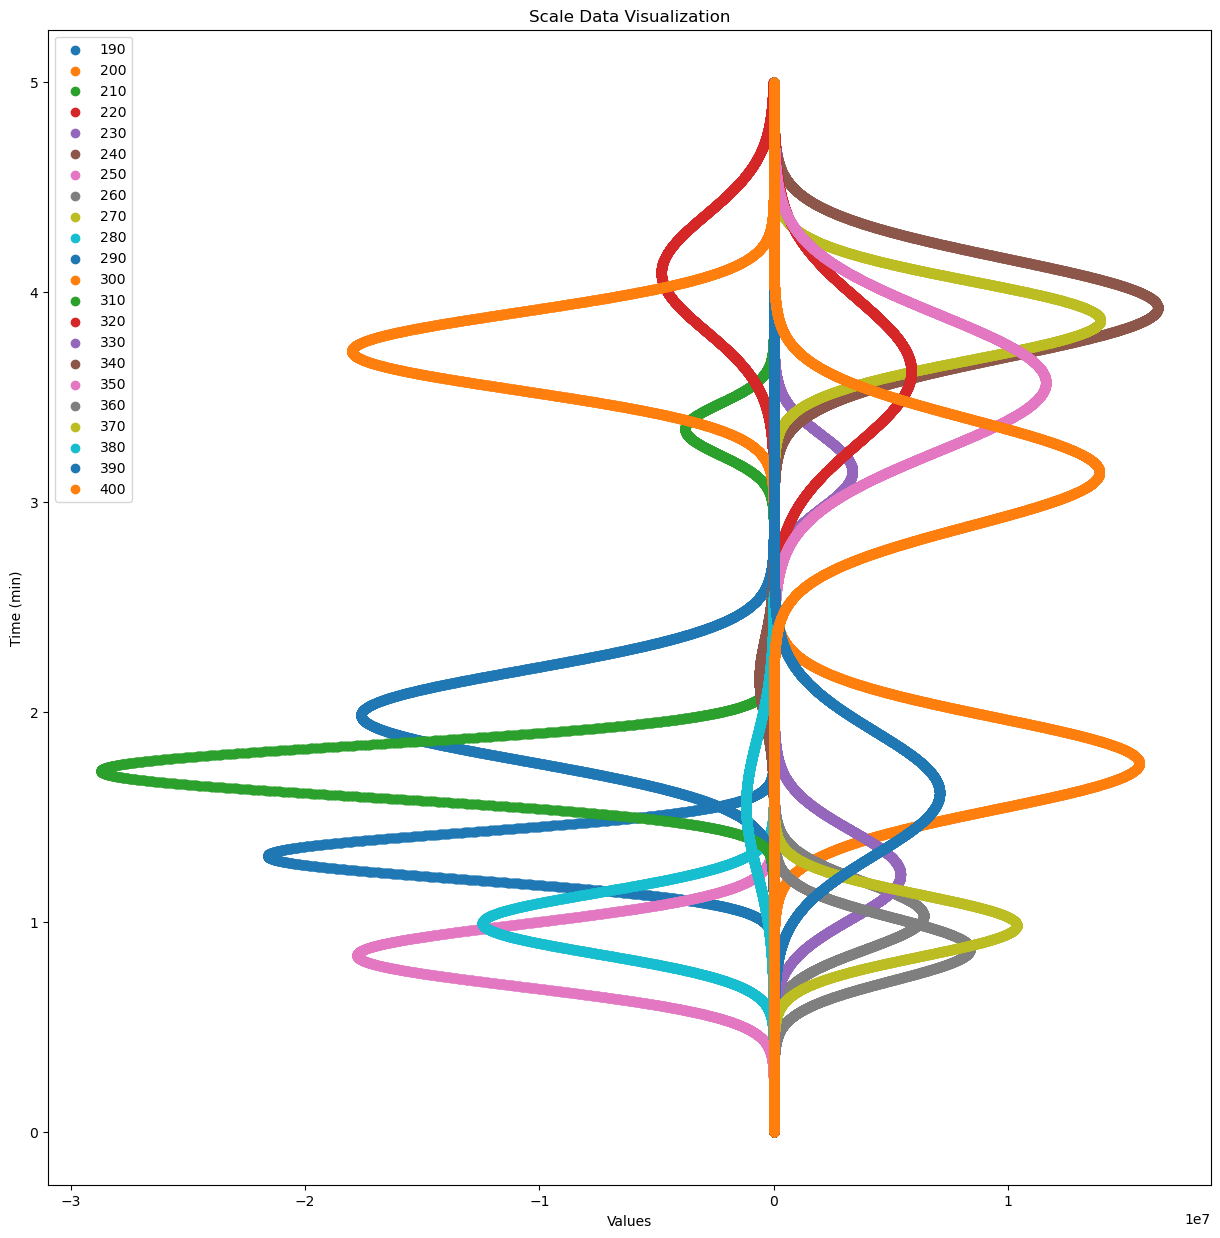

In [42]:
df_scale = pd.read_csv('scale/scale_original.csv')

X = df_scale.drop('Time (min)', axis=1)
y = df_scale['Time (min)']

plt.figure(figsize=(15,15))
plt.xlabel('Values')
plt.ylabel('Time (min)')
plt.title('Scale Data Visualization')
for c in X.columns:
    plt.scatter(X[c].values,y, label=c)
plt.legend()

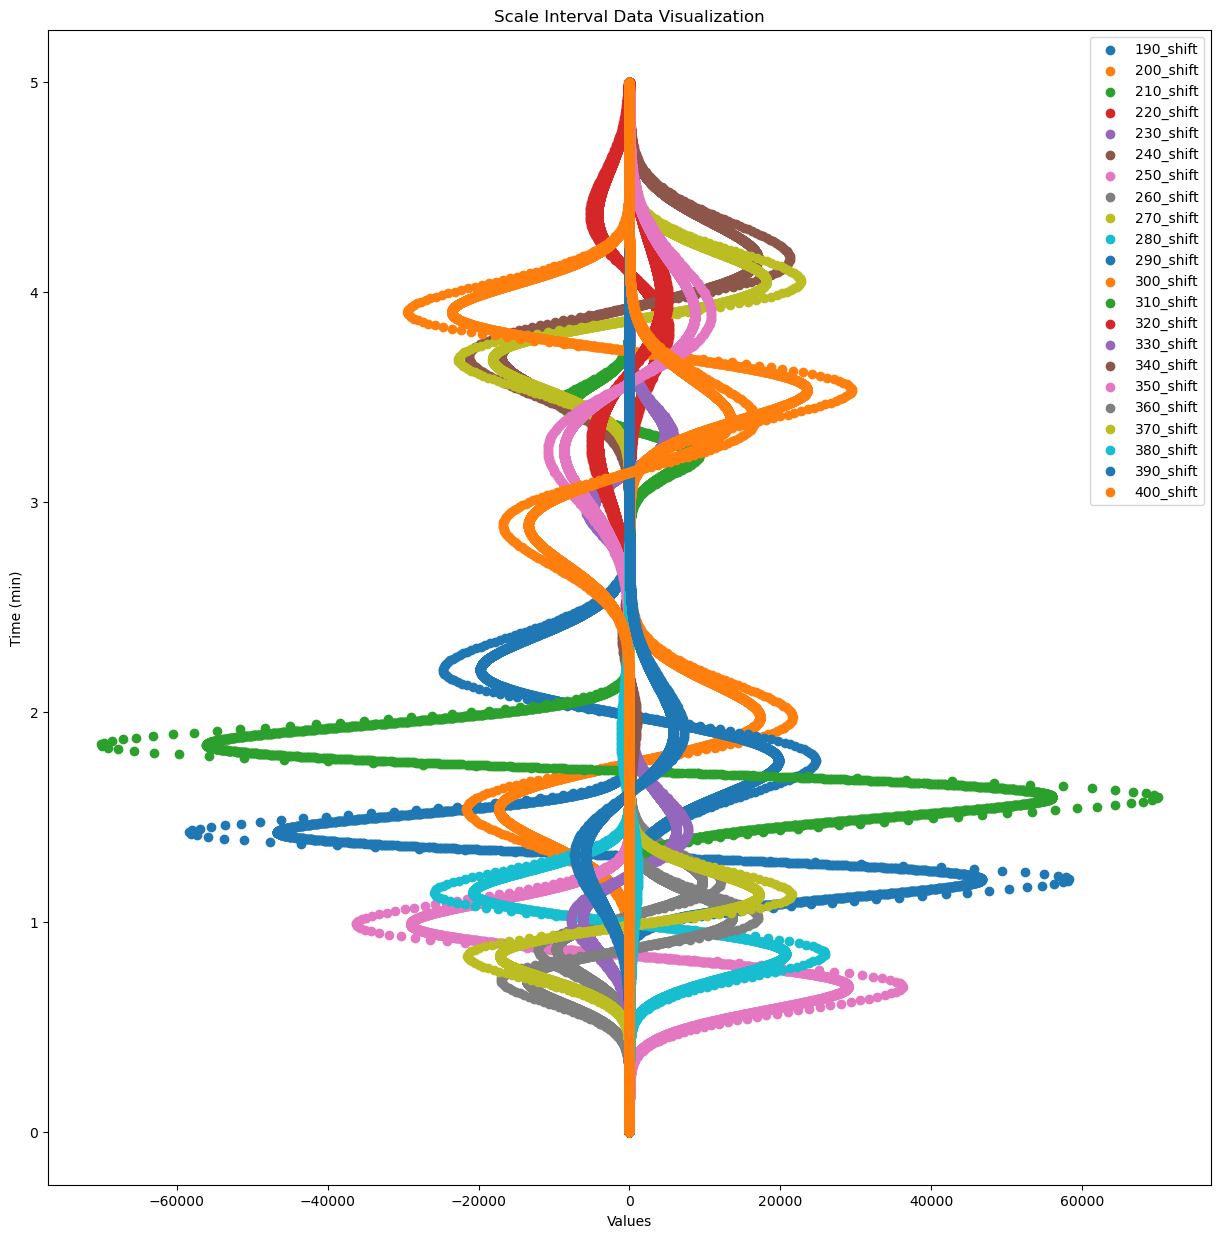

In [57]:
df_scale_shift = pd.read_csv('scale/scale_original.csv')
for c in df_scale_shift.drop('Time (min)', axis=1).columns:
    df_scale_shift[c+'_shift'] = df_scale_shift[c] - df_scale_shift[c].shift(-1)

X_shift = df_scale_shift.drop('Time (min)', axis=1)
y_shift = df_scale_shift['Time (min)']

plt.figure(figsize=(15,15))
plt.xlabel('Values')
plt.ylabel('Time (min)')
plt.title('Scale Interval Data Visualization')
for c in X_shift.columns:
    if c.find('_shift')>-1:
        plt.scatter(X_shift[c].values,y_shift, label=c)
plt.legend()

In [44]:
import altair as alt

alt.data_transformers.disable_max_rows()

In [67]:
size_selector = alt.selection_multi(encodings=['x'])


def data_plot_alt(data):
    def plotter(column):
        #valid_rows = X[column].notna()
        #plt.plot(X.loc[valid_rows, column], y[valid_rows], '.', color='k')
        #if column.find('_shift')<0:
        scatter = alt.Chart(data, width=500).mark_point().encode(
            x=column,
            y="Time (min)",
            #selected sizes are colored according to the "smoker" column, others are rendered in white
            #color = alt.condition( size_selector , "Time (min)", alt.value("white"))
        )


        scatter_shift = alt.Chart(data, width=500).mark_point().encode(
            x= column+'_shift',
            y="Time (min)",
            #selected sizes are colored according to the "smoker" column, others are rendered in white
            #color = alt.condition( size_selector , "Time (min)", alt.value("white"))
        ).add_selection(size_selector)
        
        return scatter & scatter_shift

    return plotter


In [71]:
columns = [c for c in df_scale_shift.drop('Time (min)',axis=1).columns if c.find('_shift')<0]
#dropdown_values = {"{0}: {1}".format(k, features_dict[k]):k for k in X.columns}
widgets.interact(data_plot_alt(df_scale_shift), column=columns);

interactive(children=(Dropdown(description='column', options=('190', '200', '210', '220', '230', '240', '250',…

# Sixtysix Data Visualization

In [19]:
df_sixtysix = pd.read_csv('sixtysix/sixtysix_original.csv')

X = df_sixtysix.drop('Time (min)', axis=1)
y = df_sixtysix['Time (min)']


#dropdown_values = {"{0}: {1}".format(k, features_dict[k]):k for k in X.columns}
widgets.interact(data_plot(X, y), column=X.columns);

interactive(children=(Dropdown(description='column', options=('303', '311', '316', '371', '375', '388', '402',…

/Users/lucy/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/lucy/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


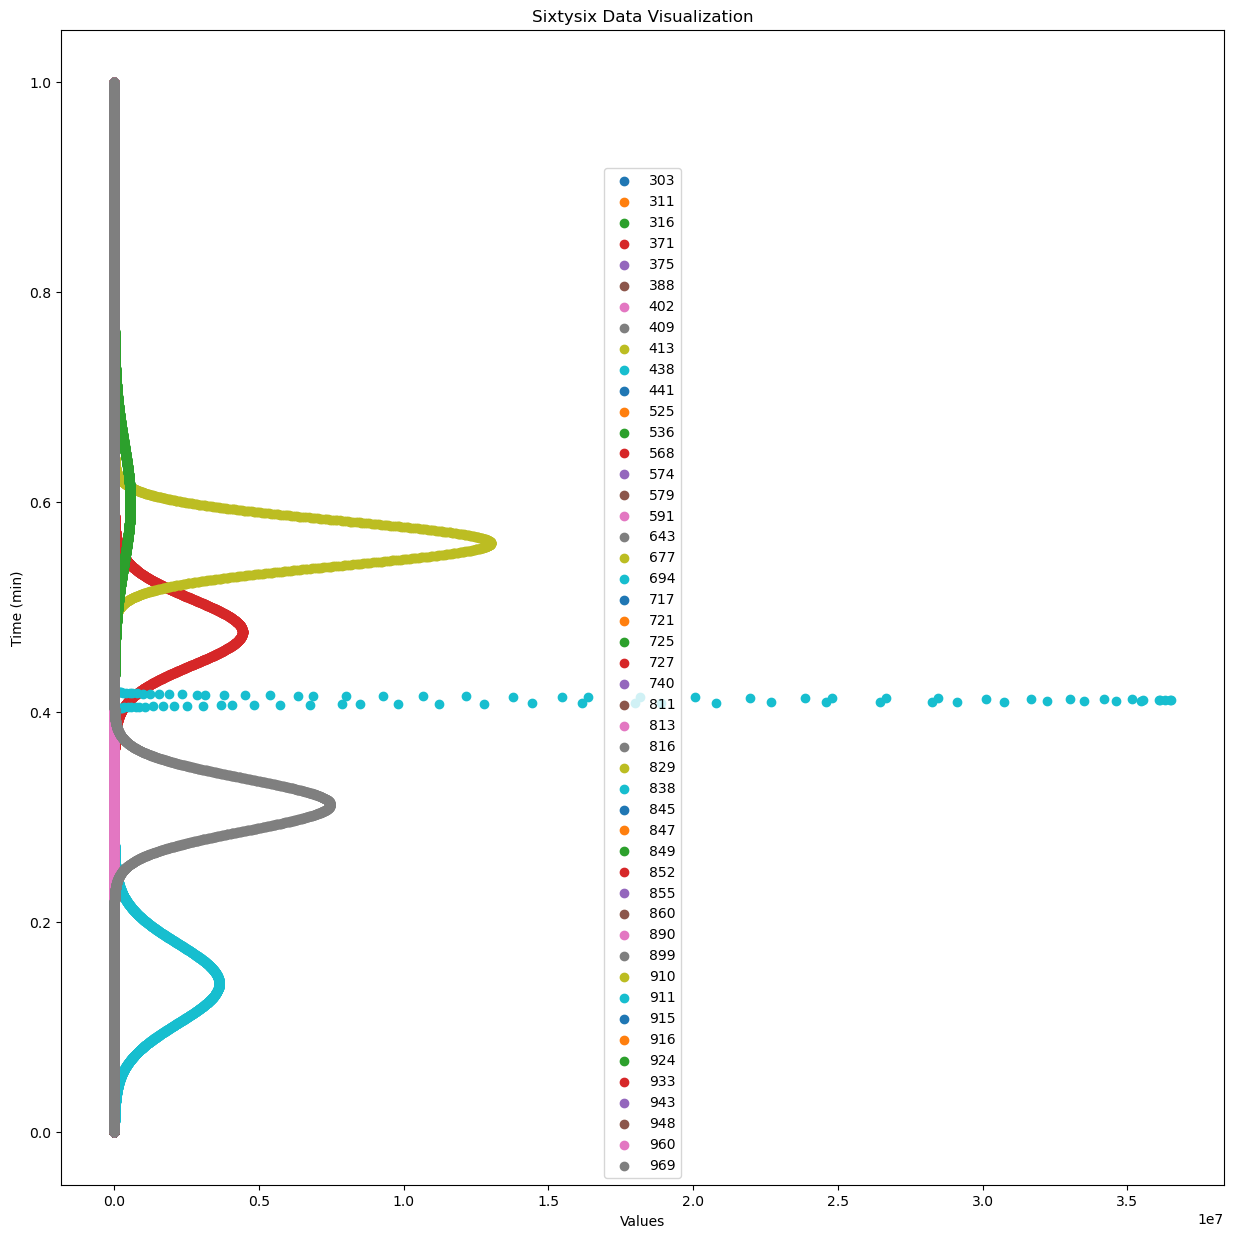

In [32]:
df_sixtysix = pd.read_csv('sixtysix/sixtysix_original.csv')

X = df_sixtysix.drop('Time (min)', axis=1)
y = df_sixtysix['Time (min)']

plt.figure(figsize=(15,15))
plt.xlabel('Values')
plt.ylabel('Time (min)')
plt.title('Sixtysix Data Visualization')
for c in X.columns:
    plt.scatter(X[c].values,y, label=c)
plt.legend()

/Users/lucy/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/lucy/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


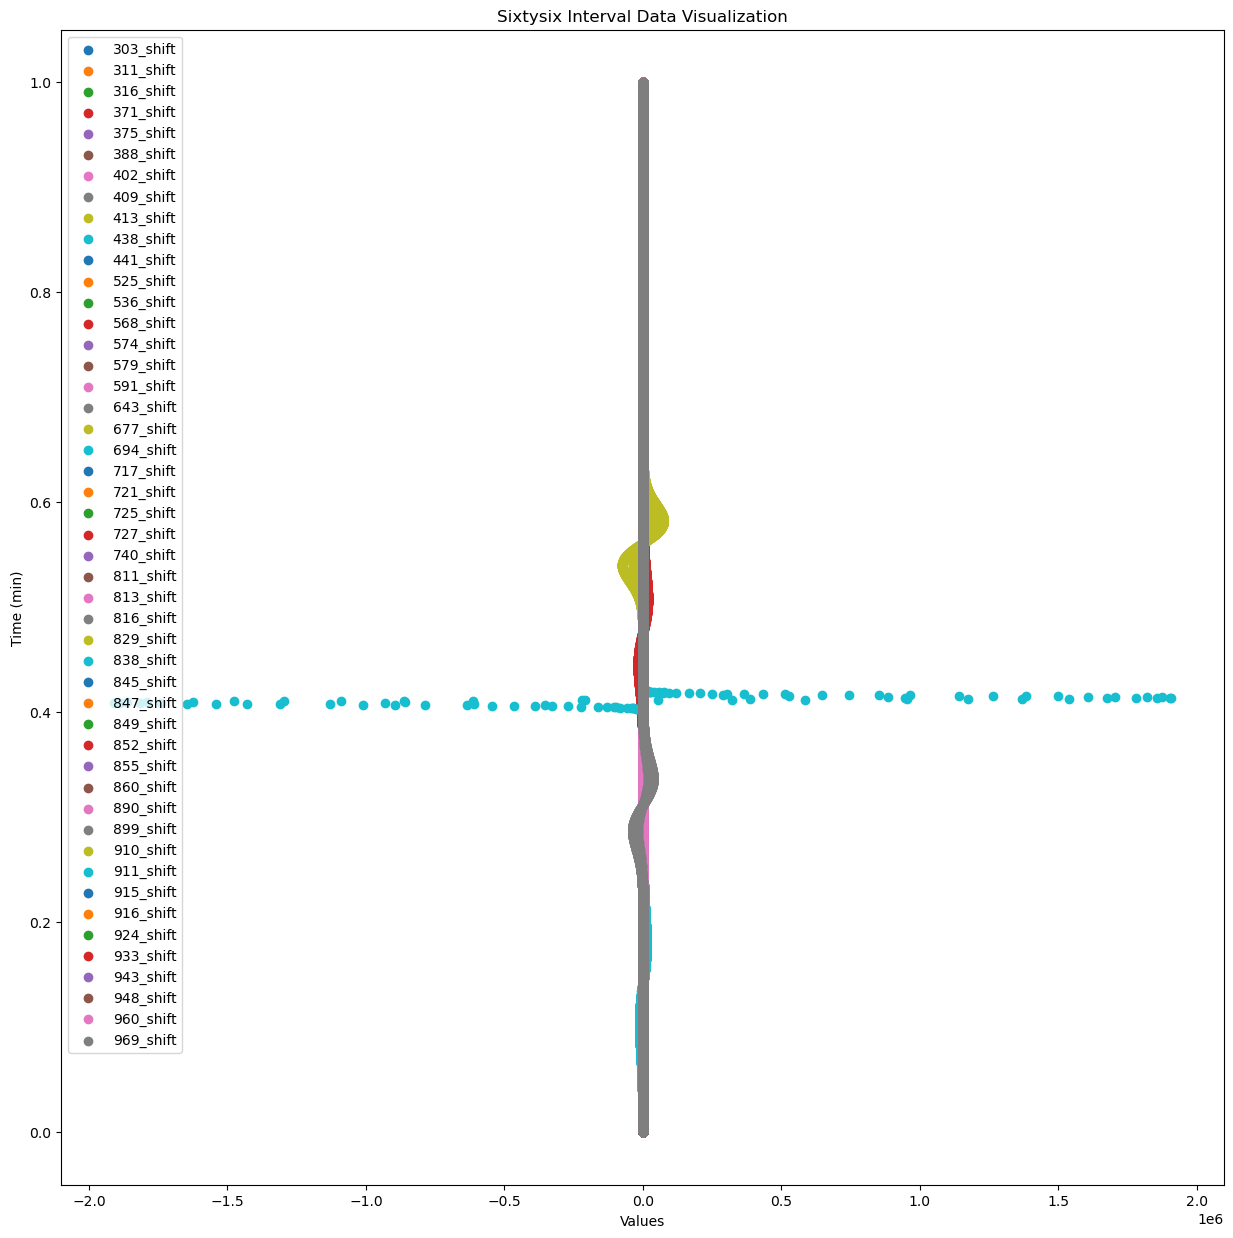

In [75]:
df_sixtysix_shift = pd.read_csv('sixtysix/sixtysix_original.csv')

for c in df_sixtysix_shift.drop('Time (min)', axis=1).columns:
    df_sixtysix_shift[c+'_shift'] = df_sixtysix_shift[c] - df_sixtysix_shift[c].shift(-1)

X_shift = df_sixtysix_shift.drop('Time (min)', axis=1)
y_shift = df_sixtysix_shift['Time (min)']


plt.figure(figsize=(15,15))
plt.xlabel('Values')
plt.ylabel('Time (min)')
plt.title('Sixtysix Interval Data Visualization')
for c in X_shift.columns:
    if c.find('_shift')>-1:
        plt.scatter(X_shift[c].values,y_shift, label=c)
plt.legend()

In [76]:
columns = [c for c in df_sixtysix_shift.drop('Time (min)',axis=1).columns if c.find('_shift')<0]
#dropdown_values = {"{0}: {1}".format(k, features_dict[k]):k for k in X.columns}
widgets.interact(data_plot_alt(df_sixtysix_shift), column=columns);

interactive(children=(Dropdown(description='column', options=('303', '311', '316', '371', '375', '388', '402',…